# Выравнивание автомобильных номеров

## Принцип работы алгоритма

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
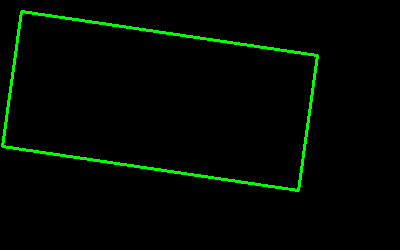

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

image = np.zeros((250, 400, 3), dtype=np.uint8)

pts1 = np.float32([[21, 11], [317, 55], [298, 190], [2, 146]])

pts1_int = pts1.astype(int).reshape((-1, 1, 2))

cv2.polylines(image, [pts1_int], isClosed=True, color=(0, 255, 0), thickness=2)

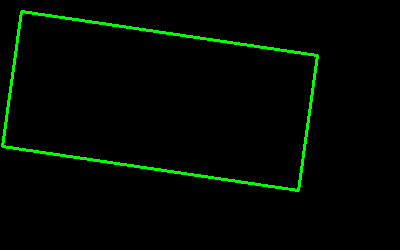

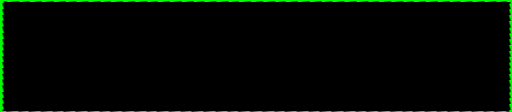

In [ ]:
image = np.zeros((250, 400, 3), dtype=np.uint8)

pts1 = np.float32([[21, 11], [317, 55], [298, 190], [2, 146]])

pts1_int = pts1.astype(int).reshape((-1, 1, 2))

cv2.polylines(image, [pts1_int], isClosed=True, color=(0, 255, 0), thickness=2)

width, height = 512, 112
pts2 = np.float32([[0, 0], [width, 0], [width, height], [0, height]])

matrix = cv2.getPerspectiveTransform(pts1, pts2)

result = cv2.warpPerspective(image, matrix, (width, height))

cv2_imshow(image)
cv2_imshow(result)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Тестирование

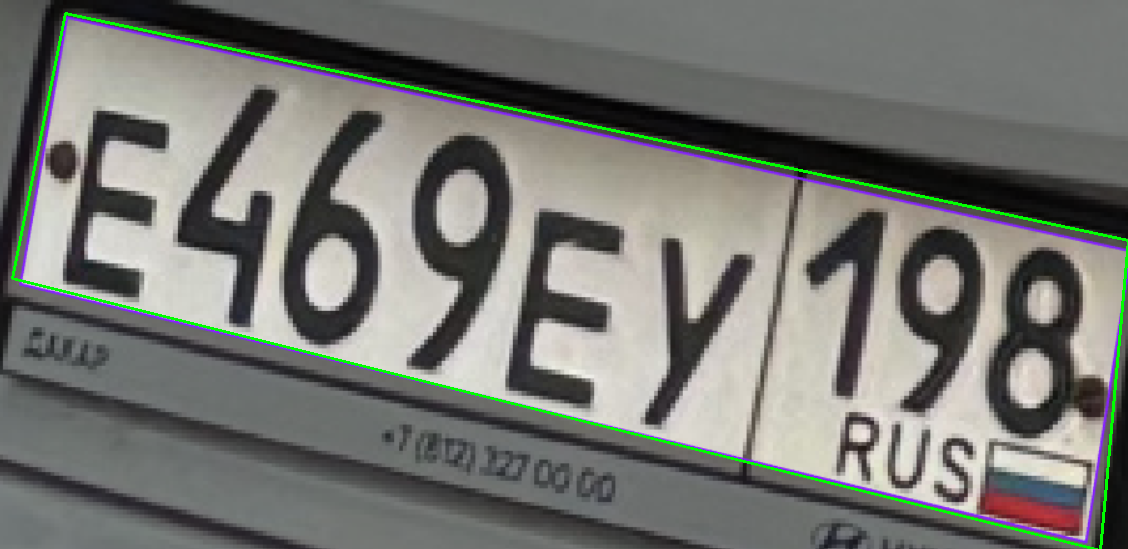

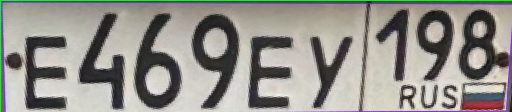

In [ ]:
def test(image):
    pts1 = np.float32([[65, 13], [1128, 240], [1100, 550], [12, 278]])
    pts1_int = pts1.astype(int).reshape((-1, 1, 2))
    cv2.polylines(image, [pts1_int], isClosed=True, color=(0, 255, 0), thickness=2)

    width, height = 512, 112
    pts2 = np.float32([[0, 0], [width, 0], [width, height], [0, height]])

    matrix = cv2.getPerspectiveTransform(pts1, pts2)
    result = cv2.warpPerspective(image, matrix, (width, height))


    cv2_imshow(image)
    cv2_imshow(result)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

image = cv2.imread('/content/Screenshot_82.png')
test(image)

## Улучшение качество фото

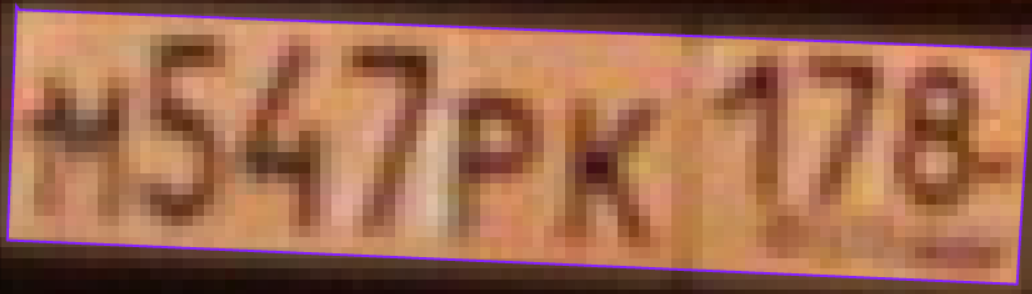

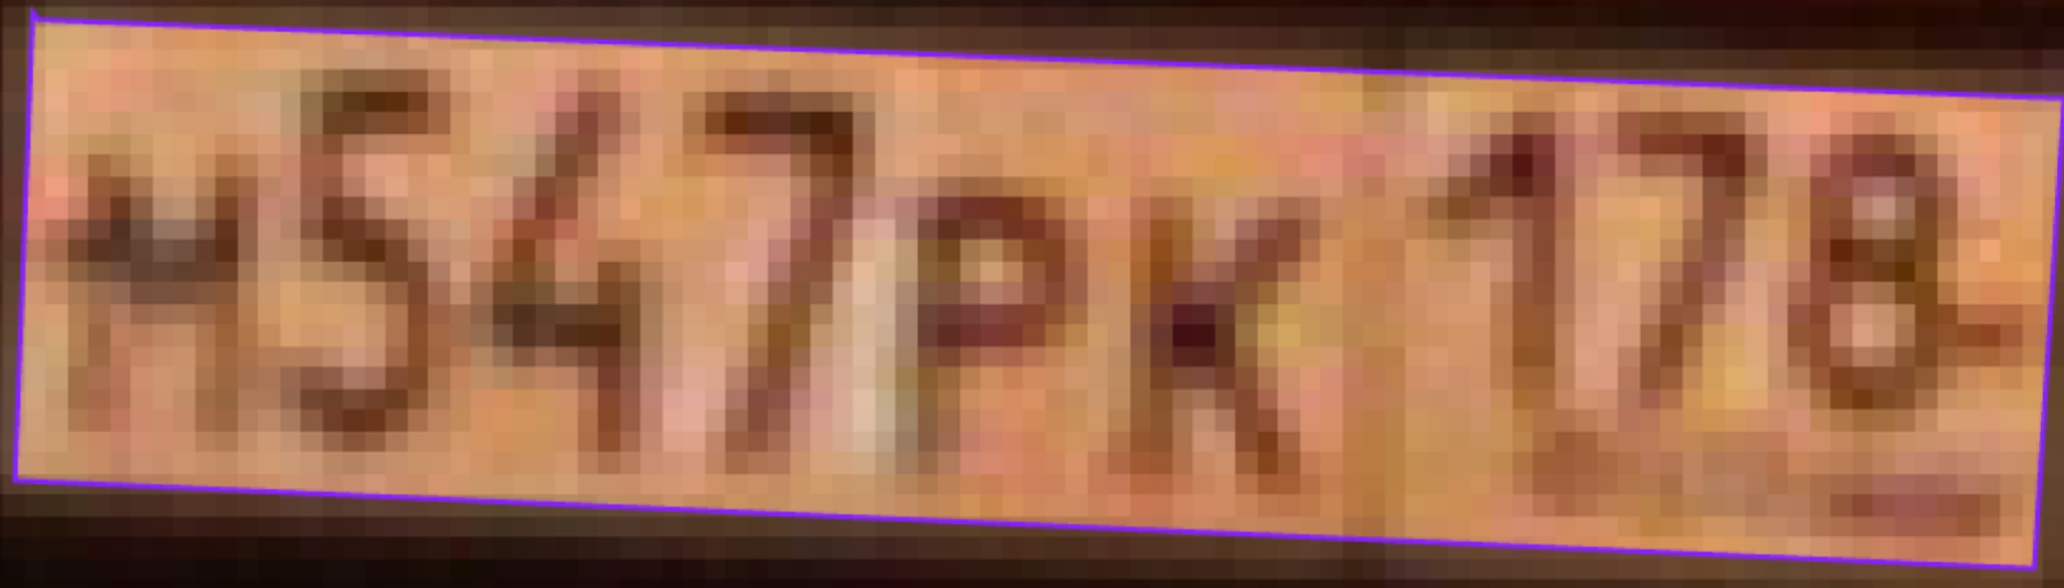

In [ ]:
from cv2 import dnn_superres
sr = dnn_superres.DnnSuperResImpl_create()
image = cv2.imread('/content/Screenshot_84.png')

path = "/content/FSRCNN_x2.pb"
sr.readModel(path)
sr.setModel("fsrcnn", 2)

try:
    result = sr.upsample(image)
except Exception as e:
    print(f"Error: Could not upsample image. Details: {e}")
else:
    # Отображение изображений
    cv2_imshow(image)
    cv2_imshow(result)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [ ]:
# import cv2
# import numpy as np
# import matplotlib.pyplot as plt
# # Import the necessary patch to display images in Colab
# from google.colab.patches import cv2_imshow

# image = cv2.imread('/content/Screenshot_82.png')

# if image is None:
#     print("Error: Could not load image.")
# else:
#     gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#     _, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)

#     contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
#     for contour in contours:
#         epsilon = 0.02 * cv2.arcLength(contour, True)
#         approx = cv2.approxPolyDP(contour, epsilon, True)

#         if len(approx) == 4:  # Если контур имеет 4 вершины, то это может быть наш четырёхугольник
#             cv2.drawContours(image, [approx], 0, (0, 255, 0), 3)
#             # Вывод координат вершин
#             for point in approx:
#                 print(point.ravel())  # Используем ravel для вывода плоского массива

#     cv2_imshow(image)
#     cv2.waitKey(0)
#     cv2.destroyAllWindows()